In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neupy import algorithms, environment

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\program files\python\python36\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
train_dataset = np.loadtxt("train_classification_dataset.csv", delimiter=',')
test_dataset = np.loadtxt("test_classification_dataset.csv", delimiter=',')

In [3]:
features_count = 2
X_train = train_dataset[:, :features_count]
y_train = train_dataset[:, features_count:]
X_test = test_dataset[:, :features_count]
y_test = test_dataset[:, features_count:]

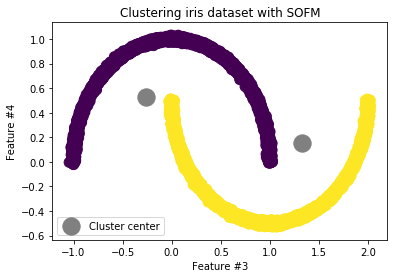

In [4]:
environment.reproducible()

sofm = algorithms.SOFM(
    n_inputs=2, # Features count
    n_outputs=2, # Clusters count
    learning_radius=0, # For clustering radius is 0
    step=0.25,
    shuffle_data=True,
    weight='sample_from_data', # Sample initial weights from the data
    verbose=False,
)
sofm.train(X_train, epochs=5)

plt.title('Clustering iris dataset with SOFM')
plt.xlabel('Feature #3')
plt.ylabel('Feature #4')

plt.scatter(*X_train.T, c=y_train.ravel(), s=100, alpha=1)
cluster_centers = plt.scatter(*sofm.weight, s=300, c='grey')

plt.legend([cluster_centers], ['Cluster center'], loc='lower left')
plt.show()